## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.getcwd())

c:\Users\syami\Desktop\HANDS-ON\Assessment_1


## 2. Data loading

In [3]:
PATH = os.getcwd()
TRAIN_PATH = os.path.join(PATH, "cases_malaysia_train.csv")
TEST_PATH = os.path.join(PATH, "cases_malaysia_test.csv")

In [4]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

## 3. Data Inspection

In [5]:
# (A) check for info
print(" -------------------TRAIN DATA INFO----------------")
df_train.info()

 -------------------TRAIN DATA INFO----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     680 non-null    object 
 1   cases_new                680 non-null    object 
 2   cases_import             680 non-null    int64  
 3   cases_recovered          680 non-null    int64  
 4   cases_active             680 non-null    int64  
 5   cases_cluster            680 non-null    int64  
 6   cases_unvax              680 non-null    int64  
 7   cases_pvax               680 non-null    int64  
 8   cases_fvax               680 non-null    int64  
 9   cases_boost              680 non-null    int64  
 10  cases_child              680 non-null    int64  
 11  cases_adolescent         680 non-null    int64  
 12  cases_adult              680 non-null    int64  
 13  cases_elderly            680

In [6]:
#check for info
print(" -------------------TEST DATA INFO----------------")
df_test.info()

 -------------------TEST DATA INFO----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     100 non-null    object 
 1   cases_new                99 non-null     float64
 2   cases_import             100 non-null    int64  
 3   cases_recovered          100 non-null    int64  
 4   cases_active             100 non-null    int64  
 5   cases_cluster            100 non-null    int64  
 6   cases_unvax              100 non-null    int64  
 7   cases_pvax               100 non-null    int64  
 8   cases_fvax               100 non-null    int64  
 9   cases_boost              100 non-null    int64  
 10  cases_child              100 non-null    int64  
 11  cases_adolescent         100 non-null    int64  
 12  cases_adult              100 non-null    int64  
 13  cases_elderly            100 n

In [7]:
# (B) Check fo NA values
df_train.isna().sum()

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

## 4. Data Cleaning

In [8]:
df_train["cluster_import"].fillna(df_train["cluster_import"].mean(), inplace=True)
df_train["cluster_highRisk"].fillna(df_train["cluster_highRisk"].median(), inplace=True)
df_train["cluster_education"].fillna(df_train["cluster_education"].median(), inplace=True)
df_train["cluster_detentionCentre"].fillna(df_train["cluster_detentionCentre"].median(), inplace=True)
df_train["cluster_workplace"].fillna(df_train["cluster_workplace"].median(), inplace=True)


In [9]:
# Fill up NA values
df_train["cases_new"] = df_train["cases_new"].interpolate()
df_train.isna().sum()

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import               0
cluster_religious          342
cluster_community          342
cluster_highRisk             0
cluster_education            0
cluster_detentionCentre      0
cluster_workplace            0
dtype: int64

In [10]:
print(df_train.columns)

Index(['date', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_child', 'cases_adolescent', 'cases_adult',
       'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80', 'cluster_import',
       'cluster_religious', 'cluster_community', 'cluster_highRisk',
       'cluster_education', 'cluster_detentionCentre', 'cluster_workplace'],
      dtype='object')


In [11]:
print(df_test.columns)

Index(['date', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_child', 'cases_adolescent', 'cases_adult',
       'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80', 'cluster_import',
       'cluster_religious', 'cluster_community', 'cluster_highRisk',
       'cluster_education', 'cluster_detentionCentre', 'cluster_workplace'],
      dtype='object')


In [12]:
non_numeric_rows = df_train[(df_train['cases_new'] == '?') | pd.to_numeric(df_train['cases_new'], errors='coerce').isna()]
print(non_numeric_rows)

           date cases_new  cases_import  cases_recovered  cases_active  \
98     2/5/2020                      11              116          1747   
217   29/8/2020                      10                8           153   
273  24/10/2020         ?            11              671          8953   
279  30/10/2020                       0              491         10380   
287   7/11/2020                       0             1029         11646   
427   27/3/2021         ?             5             1257         14127   
445   14/4/2021         ?             6             1485         16625   
446   15/4/2021         ?            19             1259         17510   
476   15/5/2021                       9             3432         41914   
587    3/9/2021         ?            14            22399        254719   
615   1/10/2021                      14            15891        159932   
640  26/10/2021         ?            15             5607         72903   

     cases_cluster  cases_unvax  case

In [13]:
df_train['cases_new'] = df_train['cases_new'].replace('?', np.nan)
df_train['cases_new'] = pd.to_numeric(df_train['cases_new'], errors='coerce')

print(df_train['cases_new'])

0         4.0
1         0.0
2         0.0
3         0.0
4         3.0
        ...  
675    4879.0
676    5439.0
677    5806.0
678    5551.0
679    4896.0
Name: cases_new, Length: 680, dtype: float64


In [14]:
df_train['cases_new'] = df_train['cases_new'].interpolate()

In [15]:
df_train['cases_new'] = df_train['cases_new'].astype('int64')
print(df_train['cases_new'])

0         4
1         0
2         0
3         0
4         3
       ... 
675    4879
676    5439
677    5806
678    5551
679    4896
Name: cases_new, Length: 680, dtype: int64


In [16]:
df_test['cases_new'] = df_test['cases_new'].interpolate()
df_test['cases_new'] = df_test['cases_new'].astype('int64')

## 5. Data Preprocessing

In [17]:
from sklearn.preprocessing import MinMaxScaler

df_train_cases = df_train['cases_new']
df_test_cases = df_test['cases_new']

mms = MinMaxScaler()
df_train_cases_scaled = mms.fit_transform(np.expand_dims(df_train_cases,axis=-1))
df_test_cases_scaled = mms.transform(np.expand_dims(df_test_cases,axis=-1))

## 6.Data windowing

In [19]:
#Data windowing
window_size = 30 #30 window = 30 input
X_train = []
y_train = []

for i in range(window_size,len(df_train_cases_scaled)):
    X_train.append(df_train_cases_scaled[i-window_size:i])
    y_train.append(df_train_cases_scaled[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
#Concatenate train and test data together
df_cases_stacked = np.concatenate((df_train_cases_scaled,df_test_cases_scaled))

#use method 2
length_days = window_size + len(df_test_cases_scaled)
tot_input = df_cases_stacked[-length_days:]
data_test = df_cases_stacked[-length_days:]

X_test = []
y_test = []

for i in range(window_size, len(data_test)):
    X_test.append(data_test[i-window_size:i])
    y_test.append(data_test[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

## 7. Model development

In [21]:
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import LSTM,Dropout,Dense
from tensorflow.keras.utils import plot_model

input_shape = np.shape(X_train)[1:]

model = Sequential()
model.add(Input(shape=(input_shape)))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(1)) 

model.summary()
plot_model(model,show_shapes=True,show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

## 8. Model Compilation

In [22]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','mape','mse'])

## 9. Model Training

In [23]:
print(X_train.shape)
print(y_train.shape) 

(650, 30, 1)
(650,)


In [24]:
y_train = y_train.reshape((y_train.shape[0], 1))

In [25]:
X_test = []
y_test = []

for i in range(window_size, len(data_test)):
    X_test.append(data_test[i - window_size:i])
    y_test.append(data_test[i])

X_test = np.array(X_test)
y_test = np.array(y_test)

#Reshape X_test to have the same shape as X_train
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [26]:
#Create a TensorBoard callback object for the usage of TensorBoard
import tensorflow as tf
import datetime
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import TensorBoard
base_log_path = r"tensorboard_logs\capstone1"
log_path = os.path.join(base_log_path,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = callbacks.TensorBoard(log_path)

In [33]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
21/21 [==============================] - 1s 50ms/step - loss: 0.0019 - mae: 0.0277 - mape: 152680.1406 - mse: 0.0019 - val_loss: 0.0137 - val_mae: 0.0736 - val_mape: 15.3838 - val_mse: 0.0137
Epoch 2/100
21/21 [==============================] - 1s 44ms/step - loss: 0.0018 - mae: 0.0268 - mape: 91374.0625 - mse: 0.0018 - val_loss: 0.0131 - val_mae: 0.0713 - val_mape: 14.7096 - val_mse: 0.0131
Epoch 3/100
21/21 [==============================] - 1s 44ms/step - loss: 0.0019 - mae: 0.0268 - mape: 117472.4219 - mse: 0.0019 - val_loss: 0.0138 - val_mae: 0.0736 - val_mape: 15.3447 - val_mse: 0.0138
Epoch 4/100
21/21 [==============================] - 1s 45ms/step - loss: 0.0020 - mae: 0.0281 - mape: 223891.2500 - mse: 0.0020 - val_loss: 0.0126 - val_mae: 0.0705 - val_mape: 14.5388 - val_mse: 0.0126
Epoch 5/100
21/21 [==============================] - 1s 49ms/step - loss: 0.0023 - mae: 0.0291 - mape: 191652.1406 - mse: 0.0023 - val_loss: 0.0194 - val_mae: 0.0853 - val_mape: 15.7534

In [34]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[tb])

Epoch 1/100
21/21 [==============================] - 1s 55ms/step - loss: 0.0014 - mae: 0.0254 - mape: 109372.6172 - mse: 0.0014 - val_loss: 0.0227 - val_mae: 0.0947 - val_mape: 16.5193 - val_mse: 0.0227
Epoch 2/100
21/21 [==============================] - 1s 62ms/step - loss: 0.0015 - mae: 0.0256 - mape: 157315.6250 - mse: 0.0015 - val_loss: 0.0204 - val_mae: 0.0899 - val_mape: 16.3426 - val_mse: 0.0204
Epoch 3/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0014 - mae: 0.0244 - mape: 147271.9062 - mse: 0.0014 - val_loss: 0.0203 - val_mae: 0.0897 - val_mape: 15.9746 - val_mse: 0.0203
Epoch 4/100
21/21 [==============================] - 1s 50ms/step - loss: 0.0016 - mae: 0.0250 - mape: 71012.6250 - mse: 0.0016 - val_loss: 0.0230 - val_mae: 0.0942 - val_mape: 16.4263 - val_mse: 0.0230
Epoch 5/100
21/21 [==============================] - 1s 49ms/step - loss: 0.0017 - mae: 0.0269 - mape: 131553.7812 - mse: 0.0017 - val_loss: 0.0197 - val_mae: 0.0880 - val_mape: 15.8269

In [35]:
# To check the MAPE error

# Obtain predictions on the testing dataset
predictions = model.predict(X_test)

# Calculate APE for each data point
ape = np.abs((y_test - predictions) / y_test) * 100

# Calculate MAPE for the testing dataset
mape = np.mean(ape)

# Calculate MAE for the testing dataset
mae = np.mean(np.abs(y_test - predictions))

# Calculate MABE for the testing dataset
mabe = np.mean(np.abs(y_test - np.mean(y_test)))

# Calculate MAPE Error Ratio
mape_error_ratio = ((mae - mabe) / mabe) * 100

# Check if MAPE Error Ratio is less than 1%
if mape_error_ratio < 1:
    print("MAPE is less than 1 percent for the testing dataset.")
else:
    print("MAPE is not less than 1 percent for the testing dataset.")

4/4 [==============================] - 0s 14ms/step
MAPE is less than 1 percent for the testing dataset.


## 10. Model Evaluation

In [44]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'mape', 'mse', 'val_loss', 'val_mae', 'val_mape', 'val_mse'])


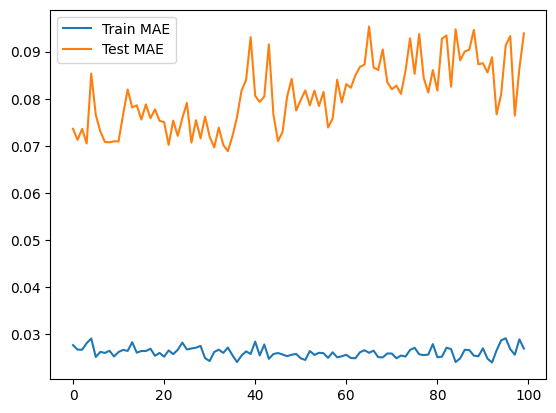

In [37]:
#Plot the evaluation graph
plt.figure()
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['Train MAE','Test MAE'])
plt.show()

## 11. Model Deployment

In [38]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 13ms/step


In [41]:
#perform inverse transform
actual_cases = mms.inverse_transform(y_test)
predicted_cases = mms.inverse_transform(y_pred)

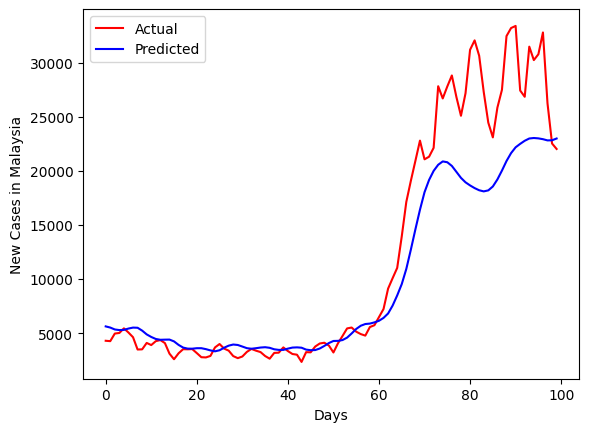

In [46]:
#Plot actual vs predicted
plt.figure()
plt.plot(actual_cases,color='red')
plt.plot(predicted_cases,color='blue')
plt.xlabel("Days")
plt.ylabel("New Cases in Malaysia")
plt.legend(['Actual','Predicted'])